In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np


In [2]:
data = pd.read_csv('survey.csv')


In [6]:
data.columns = data.columns.str.strip()


In [7]:
def convert_to_numeric(spend_range):
    ranges = {'0-500': (0, 500), '500-1500': (500, 1500), '1500-3000': (1500, 3000), '3000-5000': (3000, 5000), '>5000': (5000, np.inf)}
    return ranges.get(spend_range, (0, np.inf))[0]

data['Spending Numeric'] = data['What’s your weekly spending scorecard?'].apply(convert_to_numeric)


In [13]:
data['Preferred Mode of Payment'] = data['Which mode of payment do you prefer?'].str.strip()
data['Go-To Payment Method'] = data['What’s your go-to payment method?'].str.strip()
data['Budget Plan'] = data['Do you prefer to have a budget plan?'].str.strip()
data['Budget Plan Binary'] = data['Budget Plan'].apply(lambda x: 1 if x == 'Yes' else 0)

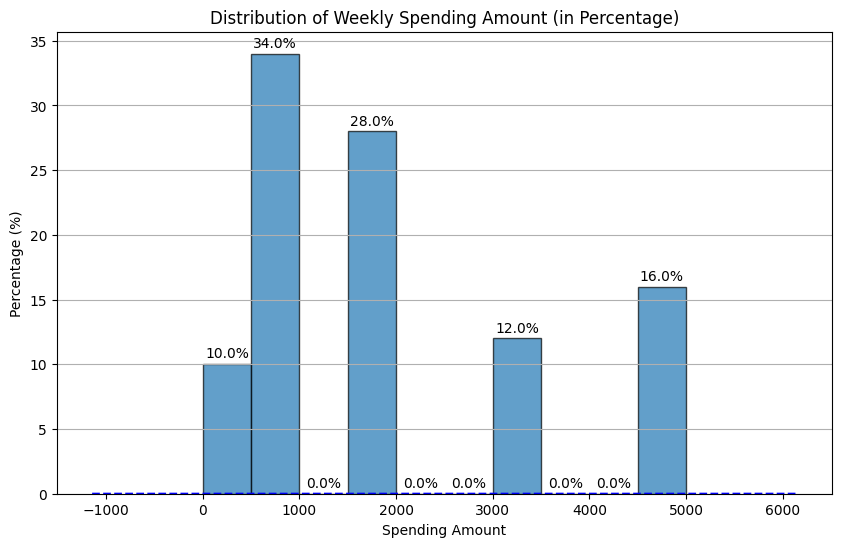

In [16]:
counts, bin_edges = np.histogram(data['Spending Numeric'].dropna(), bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

percentages = 100 * counts / counts.sum()

plt.figure(figsize=(10, 6))

plt.bar(bin_centers, percentages, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)

sns.kdeplot(data['Spending Numeric'].dropna(), bw_adjust=0.5, ax=plt.gca(), color='blue', linestyle='--')

plt.title('Distribution of Weekly Spending Amount (in Percentage)')
plt.xlabel('Spending Amount')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')

for i, percentage in enumerate(percentages):
    plt.text(bin_centers[i], percentage + 0.5, f'{percentage:.1f}%', ha='center')

plt.show()

C:\Users\Akhilesh\AppData\Local\Temp\ipykernel_25000\2122389953.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Preferred Mode of Payment', y='Spending Numeric', hue='Batch of', ci=None)


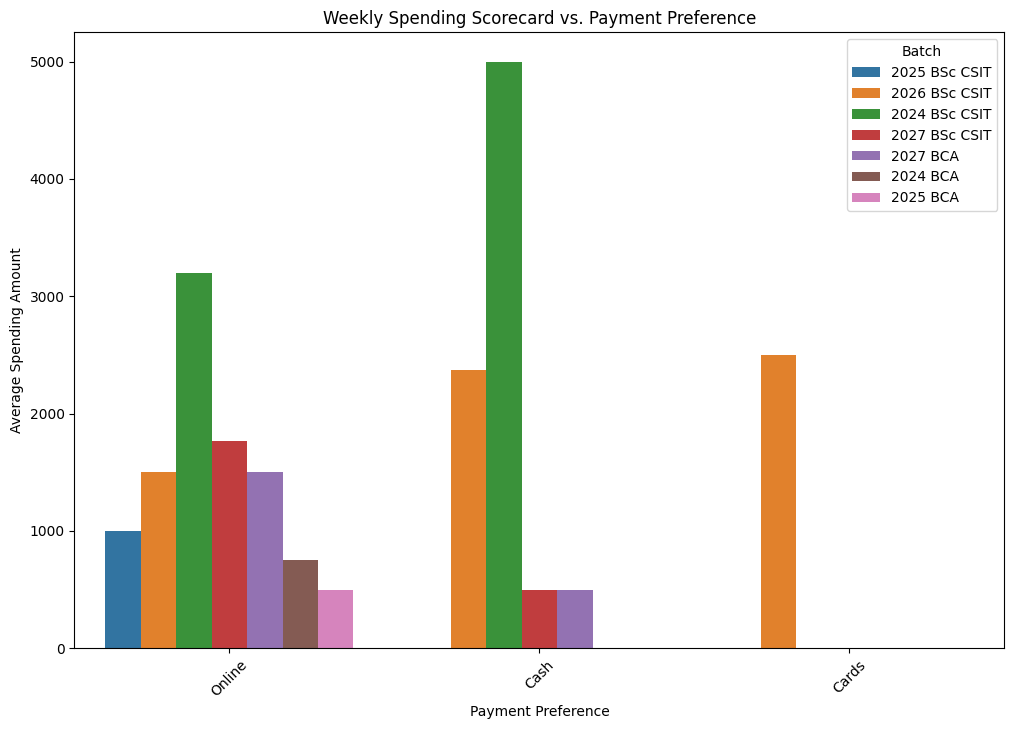

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Preferred Mode of Payment', y='Spending Numeric', hue='Batch of', ci=None)
plt.title('Weekly Spending Scorecard vs. Payment Preference')
plt.xlabel('Payment Preference')
plt.ylabel('Average Spending Amount')
plt.xticks(rotation=45)
plt.legend(title='Batch')
plt.show()


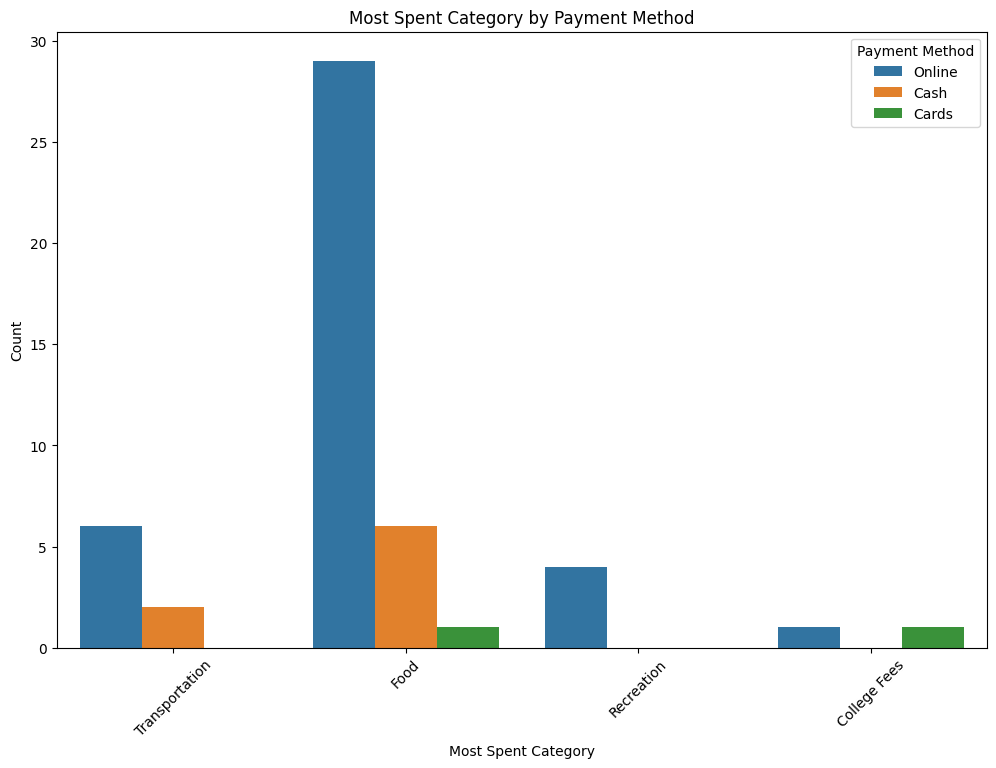

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='What’s the category where you spend the most each week?', hue='Preferred Mode of Payment')
plt.title('Most Spent Category by Payment Method')
plt.xlabel('Most Spent Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()


C:\Users\Akhilesh\AppData\Local\Temp\ipykernel_25000\239956756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Budget Plan Binary', y='Spending Numeric', palette='Set2')


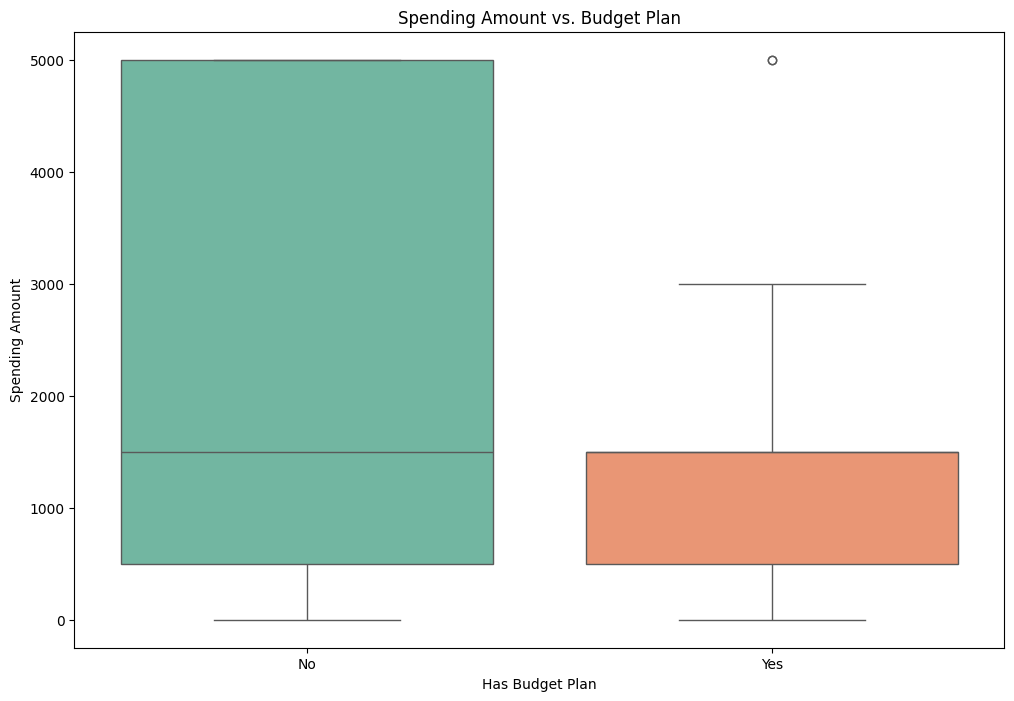

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Budget Plan Binary', y='Spending Numeric', palette='Set2')
plt.title('Spending Amount vs. Budget Plan')
plt.xlabel('Has Budget Plan')
plt.ylabel('Spending Amount')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


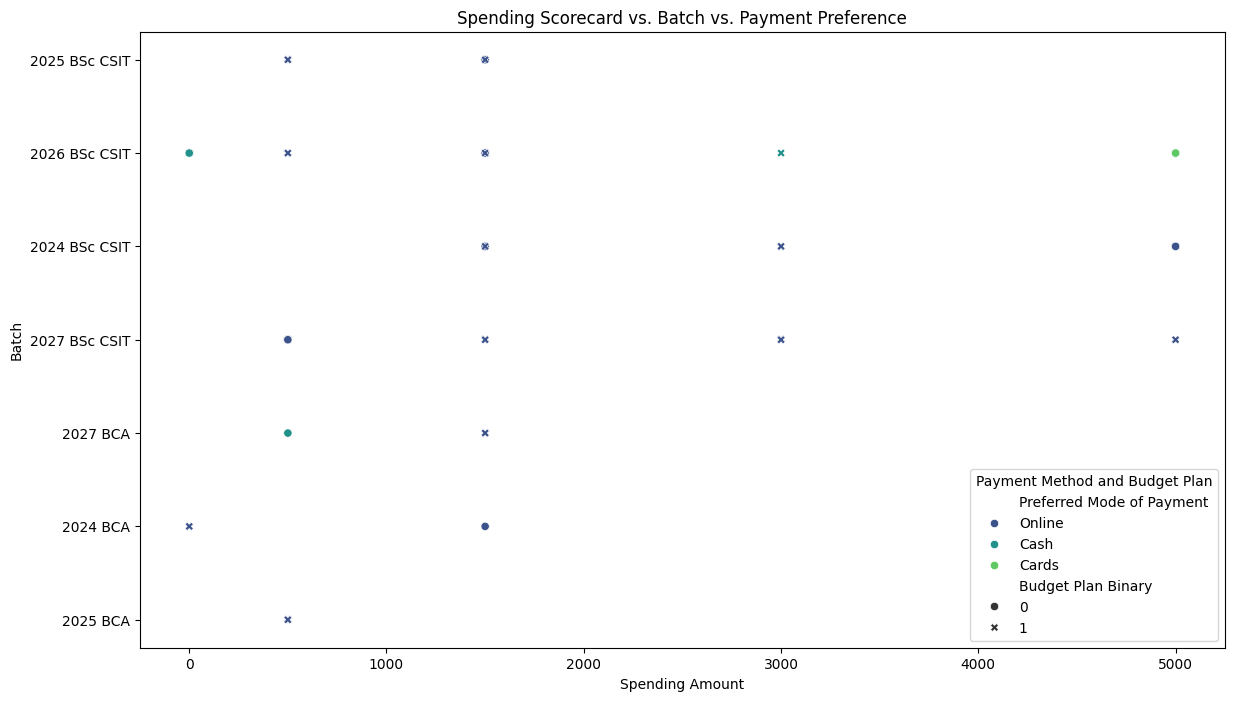

In [23]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Spending Numeric', y='Batch of', hue='Preferred Mode of Payment', style='Budget Plan Binary', palette='viridis')
plt.title('Spending Scorecard vs. Batch vs. Payment Preference')
plt.xlabel('Spending Amount')
plt.ylabel('Batch')
plt.legend(title='Payment Method and Budget Plan')
plt.show()


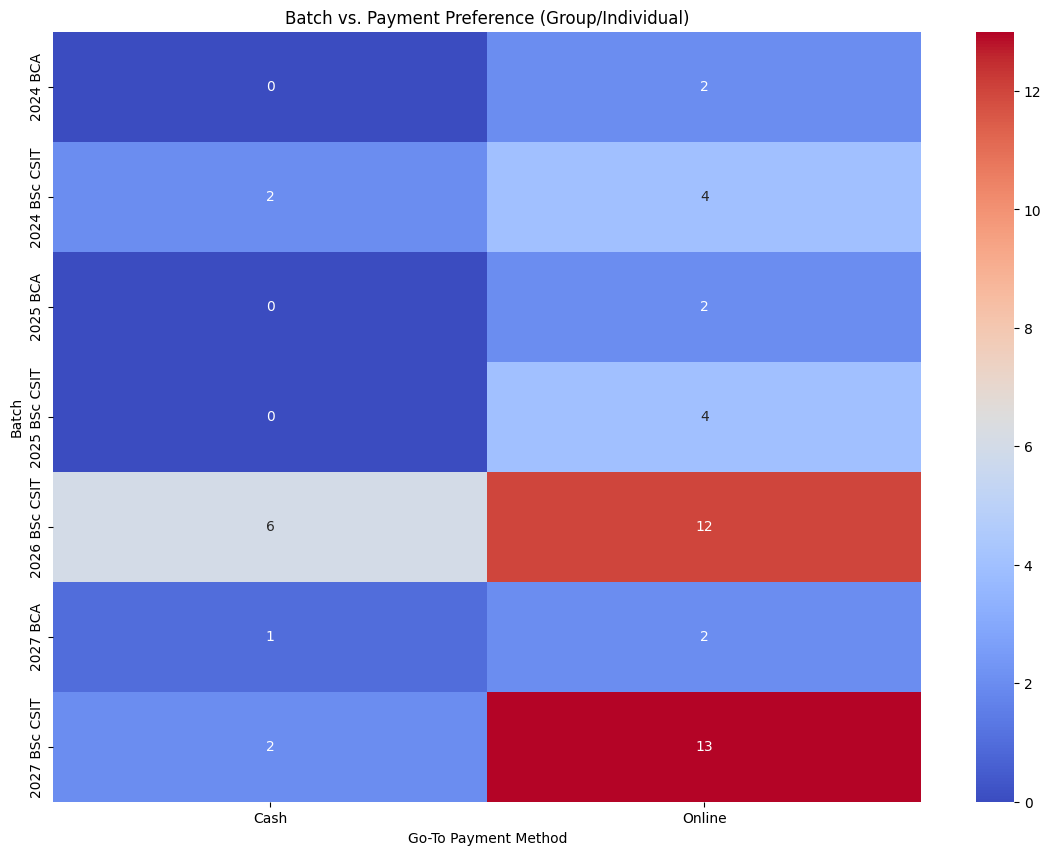

In [22]:
plt.figure(figsize=(14, 10))
sns.heatmap(pd.crosstab(index=data['Batch of'], columns=data['Go-To Payment Method']), annot=True, fmt='d', cmap='coolwarm')
plt.title('Batch vs. Payment Preference (Group/Individual)')
plt.xlabel('Go-To Payment Method')
plt.ylabel('Batch')
plt.show()


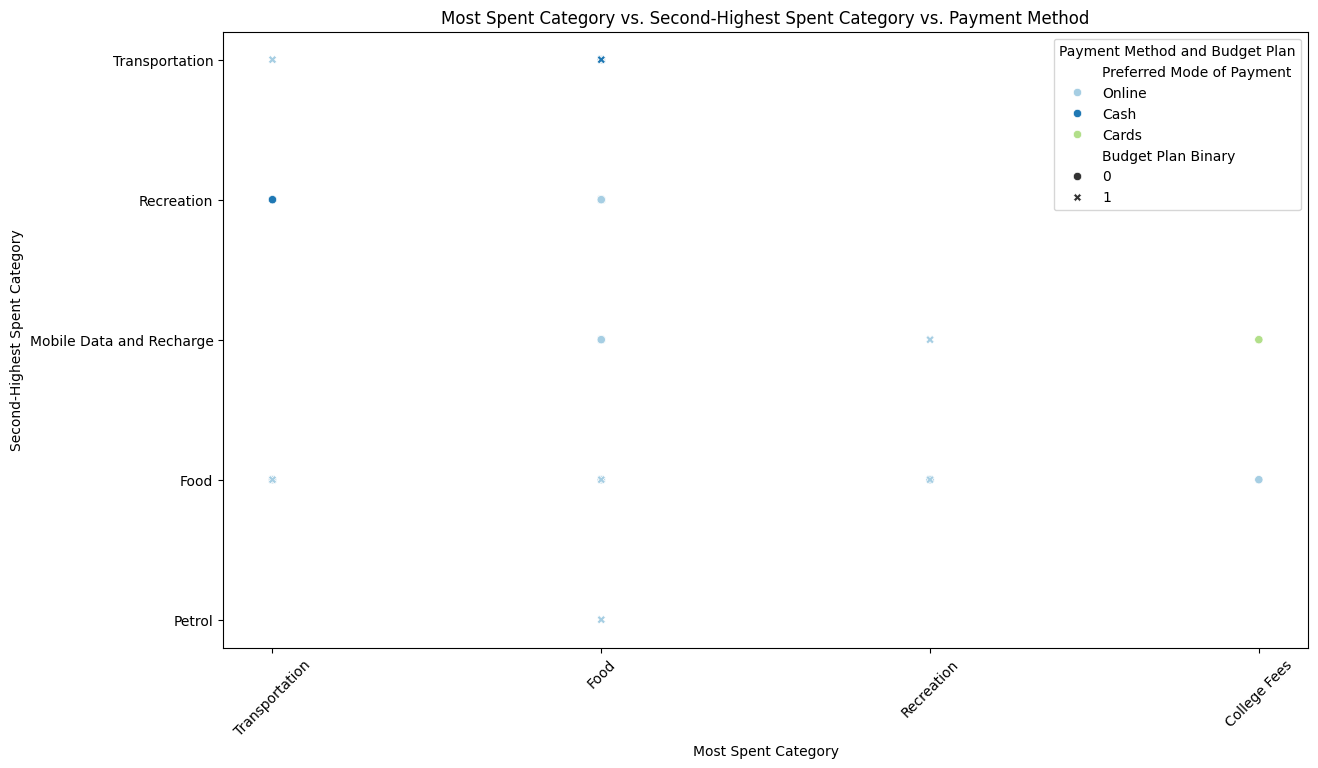

In [25]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='What’s the category where you spend the most each week?', y='What’s the second-highest category where you spend the most each week?', hue='Preferred Mode of Payment', style='Budget Plan Binary', palette='Paired')
plt.title('Most Spent Category vs. Second-Highest Spent Category vs. Payment Method')
plt.xlabel('Most Spent Category')
plt.ylabel('Second-Highest Spent Category')
plt.xticks(rotation=45)
plt.legend(title='Payment Method and Budget Plan')
plt.show()


<Figure size 1400x1000 with 0 Axes>

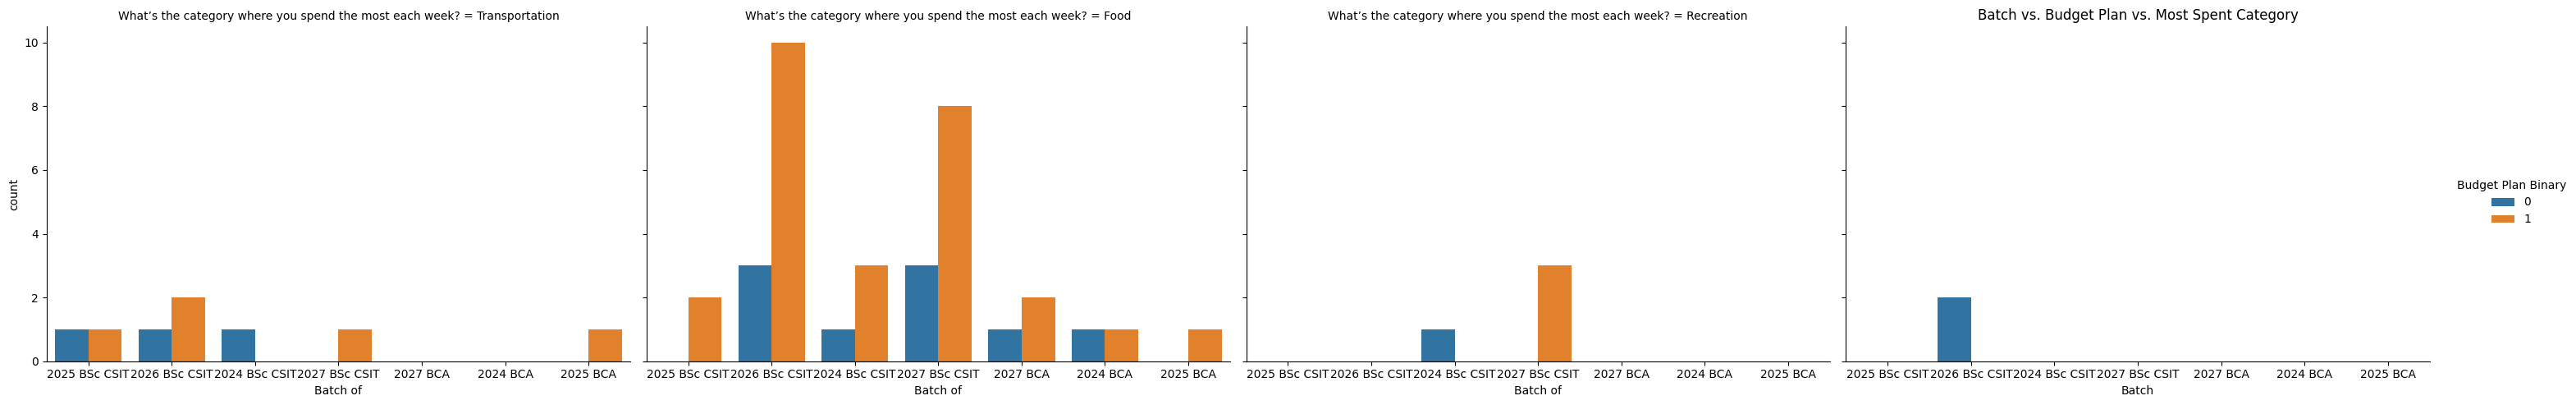

In [27]:
plt.figure(figsize=(14, 10))
sns.catplot(data=data, x='Batch of', hue='Budget Plan Binary', col='What’s the category where you spend the most each week?', kind='count', height=5, aspect=1.5)
plt.title('Batch vs. Budget Plan vs. Most Spent Category')
plt.xlabel('Batch')
plt.ylabel('Count')
plt.show()


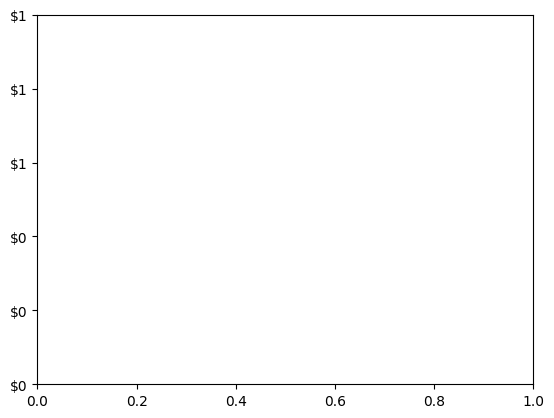

In [28]:
def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)


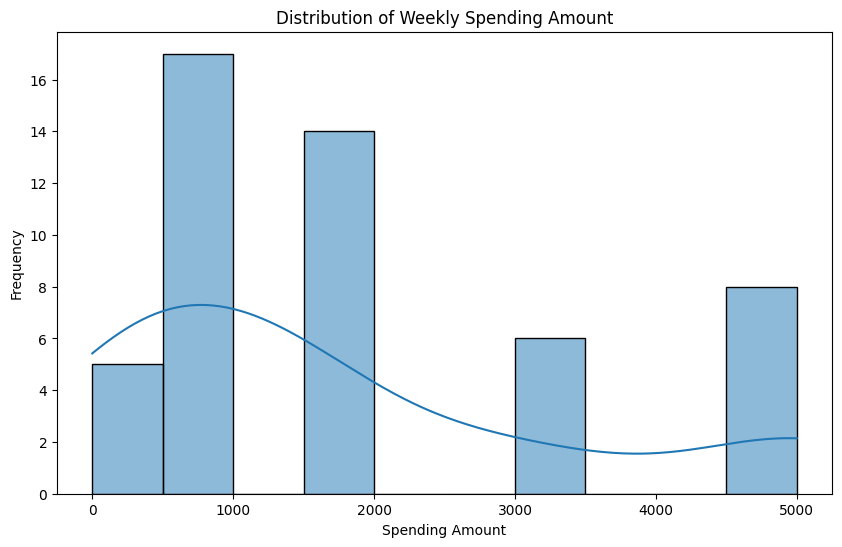

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Numeric'], bins=10, kde=True)
plt.title('Distribution of Weekly Spending Amount')
plt.xlabel('Spending Amount')
plt.ylabel('Frequency')
plt.savefig('spending_distribution.png')